In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ploting.utlis as pltu

In [118]:
meta_open = pd.read_csv('./data/raw/meta_open.csv')
meta_open

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.00000,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.00000,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.00000,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.00000,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.00000,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,UnivLab_Tami,31/12/13 23:00,1/1/13 0:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,73981.36109,6873.100000,College/University,Europe/Zurich,NaN,Tami,UnivLab,weather8.csv,schedule6.csv
503,UnivLab_Taylor,31/12/13 23:00,1/1/13 0:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,64940.76148,6033.200000,College/University,Europe/Zurich,NaN,Taylor,UnivLab,weather8.csv,schedule6.csv
504,UnivLab_Terrie,31/12/13 23:00,1/1/13 0:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,86436.26978,8030.200000,College/University,Europe/Zurich,NaN,Terrie,UnivLab,weather8.csv,schedule6.csv
505,UnivLab_Tracie,31/12/13 23:00,1/1/13 0:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,648094.41900,60210.000000,College/University,Europe/Zurich,NaN,Tracie,UnivLab,weather8.csv,schedule6.csv


In [119]:
meta_open.shape

(507, 20)

In [120]:
meta_open.loc[~meta_open['yearbuilt'].str.contains(r'^[0-9]{4}$', regex= True, na=True),'yearbuilt'].unique()

array(['1898-1902', '1913-1915', '1754-1756', '1862-1875',
       '11th Century onwards', '1888-1890', '1903-1906', 'post 1976',
       'Post 1976', '1945-1966', 'pre 1919', '1919-1945', 'Pre 1919',
       '1967-1976'], dtype=object)

In [121]:
from math import nan

meta_open['yearbuilt'] = meta_open['yearbuilt'] \
    .replace(to_replace=r'^[0-9]{4}\-([0-9]{4})$', value=r'\1', regex=True) \
    .replace('11th Century onwards', 'nan') \
    .replace('post 1976', '1976') \
    .replace('Post 1976', '1976') \
    .replace('pre 1919', '1919') \
    .replace('Pre 1919', '1919') \
    .replace('2969', '1969') \
    .astype('float')

In [122]:
meta_open['heatingtype'] = meta_open['heatingtype'] \
    .replace('District Heating', 'District heating') \
    .replace('Electric', 'Electricity')

In [123]:
meta_open['mainheatingtype'] = meta_open['mainheatingtype'] \
    .replace('District Heating', 'District heating') \
    .replace('Electric', 'Electricity')

In [124]:
meta_open_describe = pd.DataFrame(meta_open.isna().sum(), columns=['na_sum'])

meta_open_describe['name'] = [
    'identifier', 'last measurement date', 'first measurement date', 'energy efficiency', 'type of heating', 'sector',
    'main type of heating', 'number of floors', 'number of occupants', 'usage', 'energy efficiency class',
    'usable area (sqft)', 'usable area (sqm)', 'subsector', 'timezone', 'year of construction', 'nickname',
    'usage (abbr.)', 'weather', 'schedule'
]

meta_open_describe['na_pct'] = meta_open_describe['na_sum'] / meta_open.shape[0]

meta_open_describe.loc[meta_open.dtypes == 'object', 'type'] = 'categorical'
meta_open_describe.loc[meta_open.dtypes == 'float64', 'type'] = 'numeric'
meta_open_describe.loc[['uid','nickname'], 'type'] = 'identifier'

meta_open_describe.loc[meta_open_describe.type == 'categorical', 'values'] = ''

for index, row in meta_open_describe.iterrows():
    if row['type'] == 'categorical':
        values = meta_open[index].unique().astype(str)
        meta_open_describe.loc[index, 'values'] = ', '.join(values)
        meta_open_describe.loc[index, 'values_num'] = len(values)

meta_open_describe

,na_sum,name,na_pct,type,values,values_num
uid,0,identifier,0.000000,identifier,NaN,NaN
dataend,0,last measurement date,0.000000,categorical,"31/12/15 23:00, 31/12/12 23:00, 31/12/10 23:00...",8.0
datastart,0,first measurement date,0.000000,categorical,"1/1/15 0:00, 1/1/12 0:00, 1/1/10 0:00, 1/12/14...",8.0
energystarscore,481,energy efficiency,0.948718,numeric,NaN,NaN
heatingtype,383,type of heating,0.755424,categorical,"nan, Gas, District heating, Electricity, Oil, ...",8.0
industry,0,sector,0.000000,categorical,"Education, Commercial Property, Government",3.0
mainheatingtype,385,main type of heating,0.759369,categorical,"nan, Gas, Electricity, Oil, Heat Network, Biom...",7.0
numberoffloors,383,number of floors,0.755424,numeric,NaN,NaN
occupants,402,number of occupants,0.792899,numeric,NaN,NaN
primaryspaceusage,0,usage,0.000000,categorical,"Office, Primary/Secondary Classroom, College C...",5.0


In [125]:
from math import trunc


def truncate(value, decimals=4):
    factor = 10.0 ** decimals
    return trunc(value * factor) / factor

In [126]:
def draw_categorical_hist(values, name):
    plt.figure(figsize=(12, 6))
    value_counts = values.value_counts(normalize=True)
    plt.bar(value_counts.index, value_counts.values)

    plt.title(f'{name}, number of categories={len(value_counts)}', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Category', fontsize=14)
    plt.yticks(fontsize=14)
    locs, _ = plt.xticks()
    rotation = 90 if len(value_counts) > 30 else -45
    horizontalalignment = 'right' if len(value_counts) > 30 else 'left'
    plt.xticks(ticks=locs, labels=value_counts.index, rotation=rotation, horizontalalignment='left', fontsize=14)
    plt.ylim((0, value_counts.values[0] * 1.2))

    rotation = 90 if len(value_counts) > 10 else 0
    for i, v in enumerate(value_counts.values):
        if v == 0:
            continue;
        
        rounded_height = truncate(v, 4)
        text = '<0,0001' if rounded_height == 0 else str(rounded_height).replace('.', ',')
        fontsize = 10 if rounded_height == 0 else 12
        plt.annotate(text, (i, v), textcoords="offset points", va='bottom', ha='center', fontsize=fontsize, xytext=(0,5), rotation=rotation)

    plt.show()

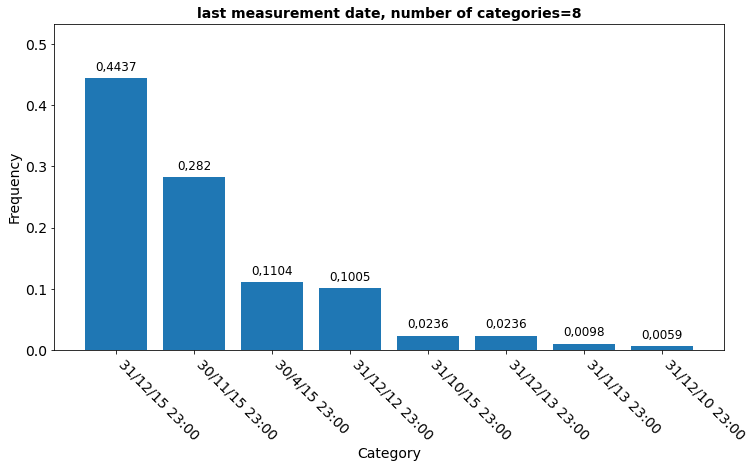

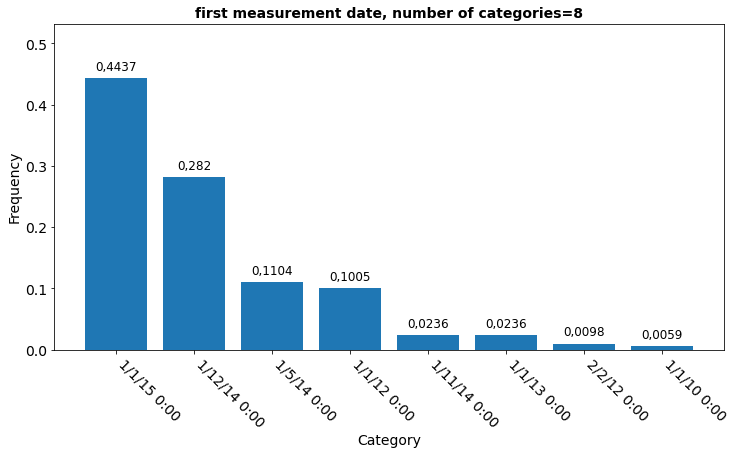

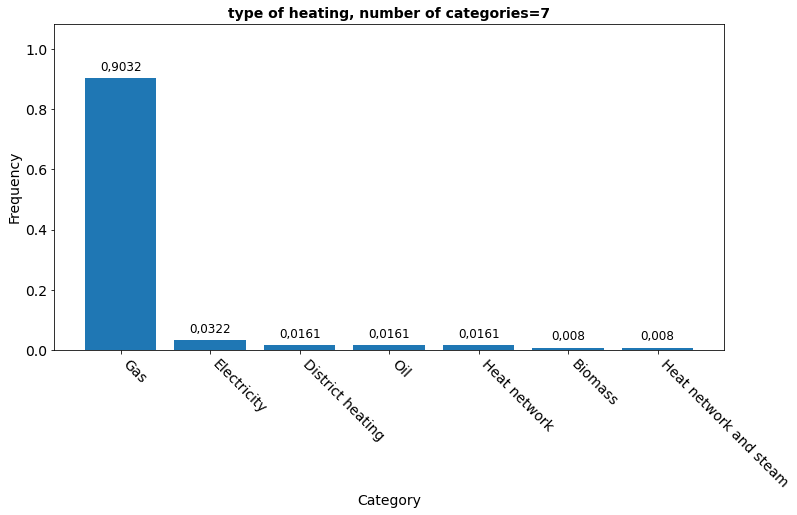

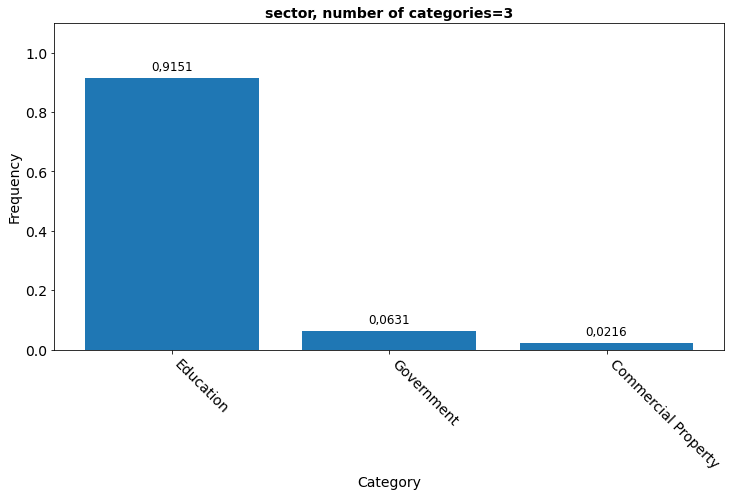

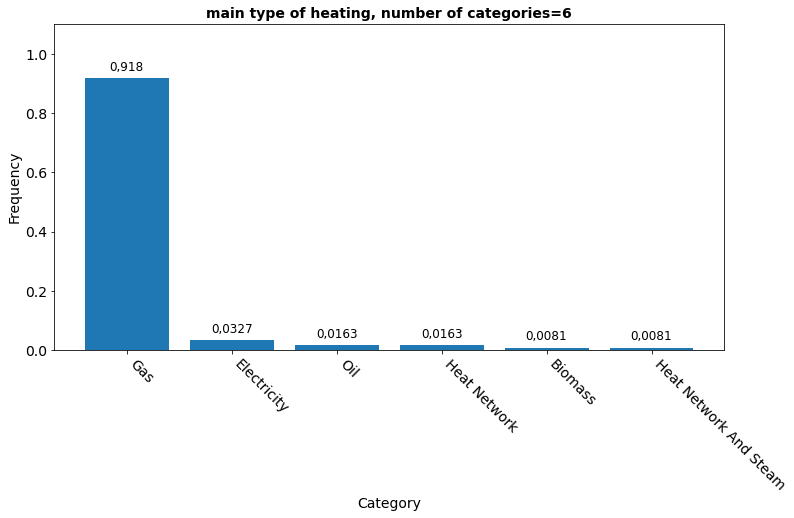

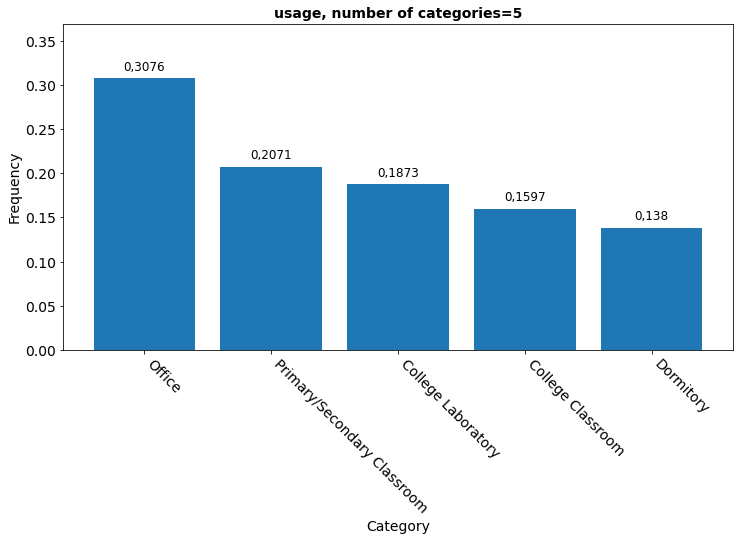

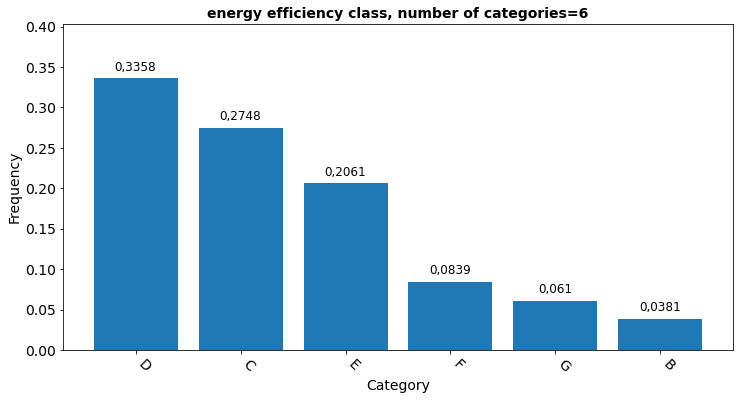

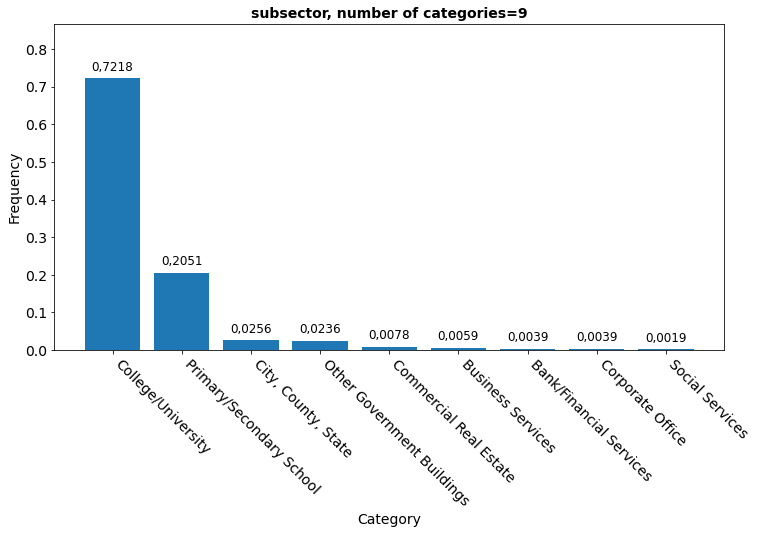

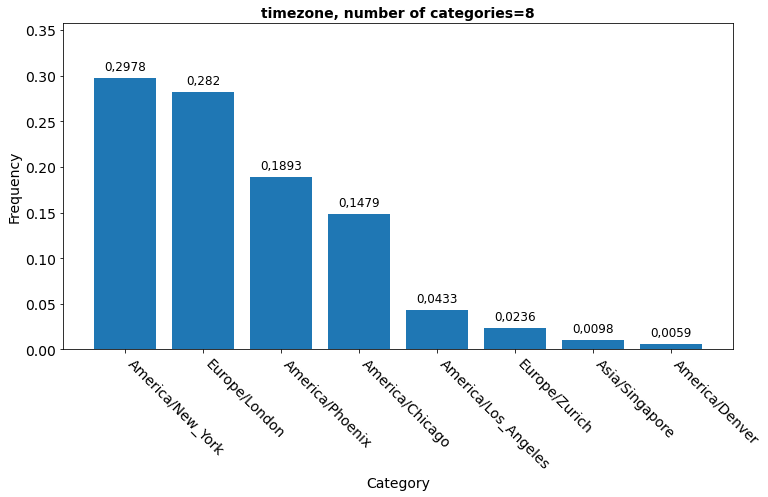

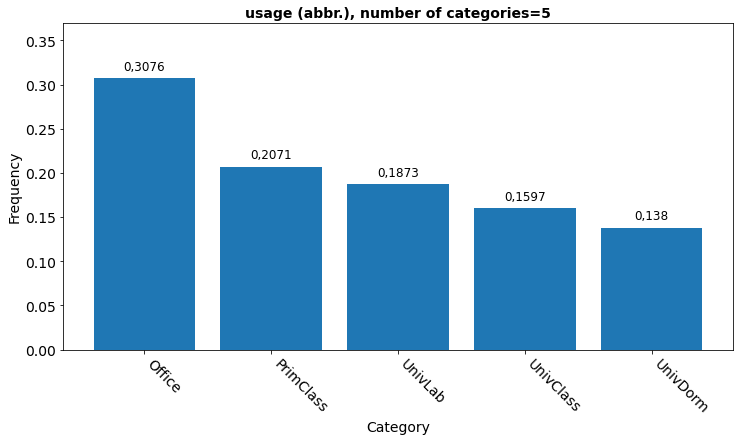

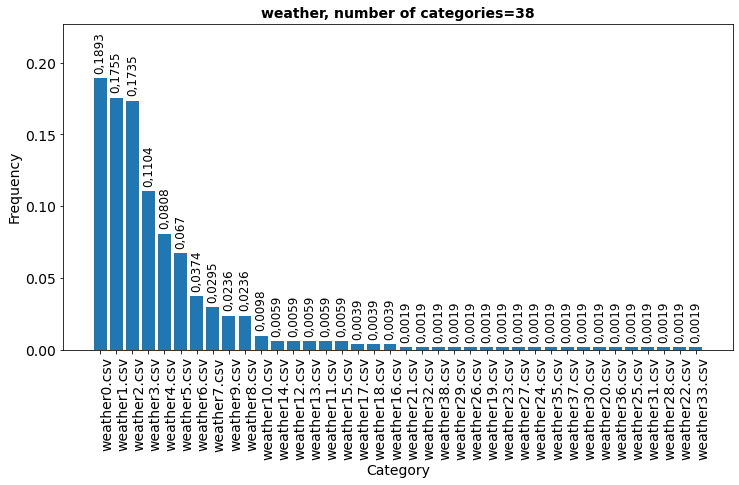

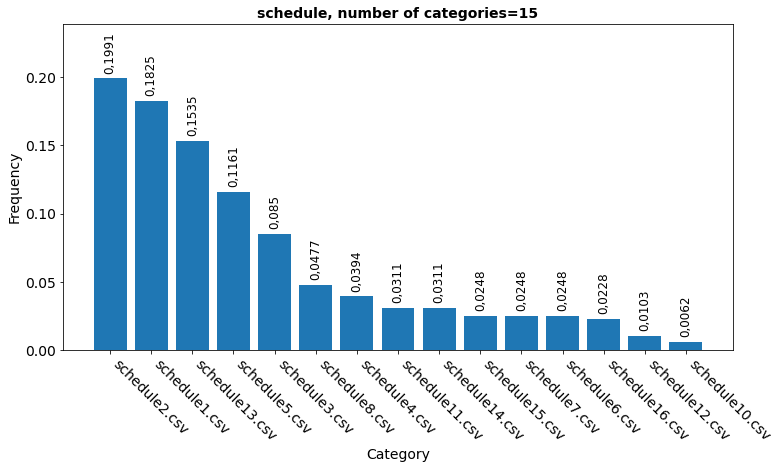

In [127]:
categorical_columns = meta_open_describe.loc[meta_open_describe.type == 'categorical'].index

for index, column in enumerate(categorical_columns):
    draw_categorical_hist(meta_open[column], meta_open_describe.loc[column, 'name'])

In [128]:
def draw_hist(values, bins, title):
    values_range = (np.min(values), np.max(values))

    heights, all_bins = np.histogram(values, bins=bins, range=values_range)
    heights = heights / heights.sum()

    width = all_bins[1] - all_bins[0]

    plt.figure(figsize=(12, 6))
    plt.bar(all_bins[:-1], heights, width=width, align='edge', edgecolor='black')

    plt.title(f'{title}, number of bins={bins}', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Value', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=all_bins, labels=[pltu.format_float(bin, 2) for bin in all_bins], rotation=90, fontsize=14)
    plt.ylim((0, np.max(heights) * 1.25))

    shift_by = width / 2
    rotation = 90 if len(heights) > 10 else 0
    for bin, height in zip(all_bins[:-1], heights):
        if height == 0:
            continue;
        
        rounded_height = truncate(height, 4)
        text = '<0,0001' if rounded_height == 0 else str(rounded_height).replace('.', ',')
        fontsize = 10 if rounded_height == 0 else 12
        plt.annotate(text, (bin + shift_by, height), textcoords="offset points", va='bottom', ha='center', fontsize=fontsize, xytext=(0,5), rotation=rotation)

    plt.show()

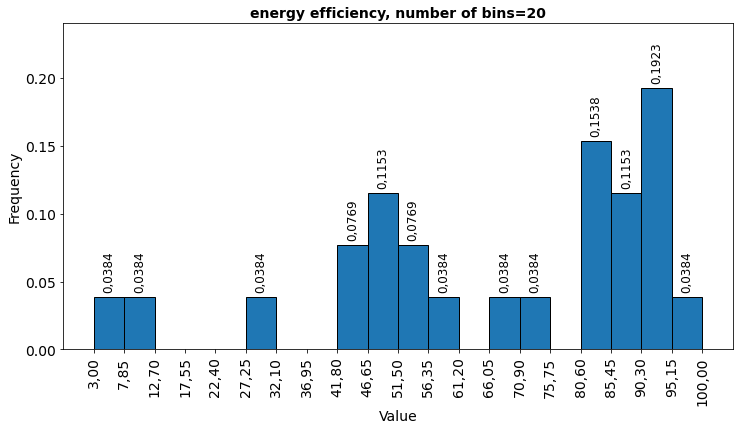

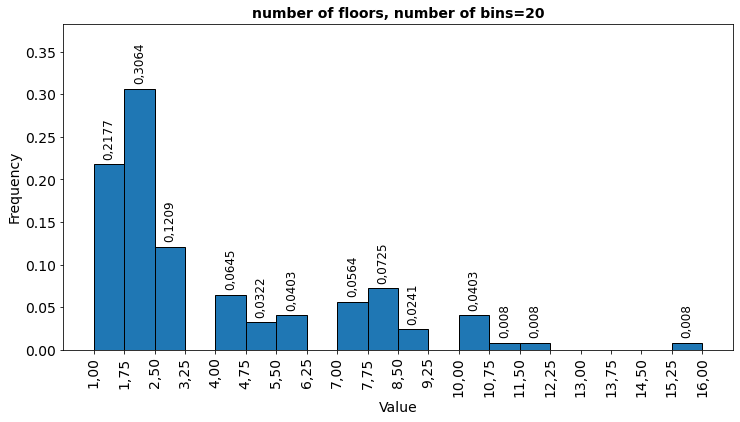

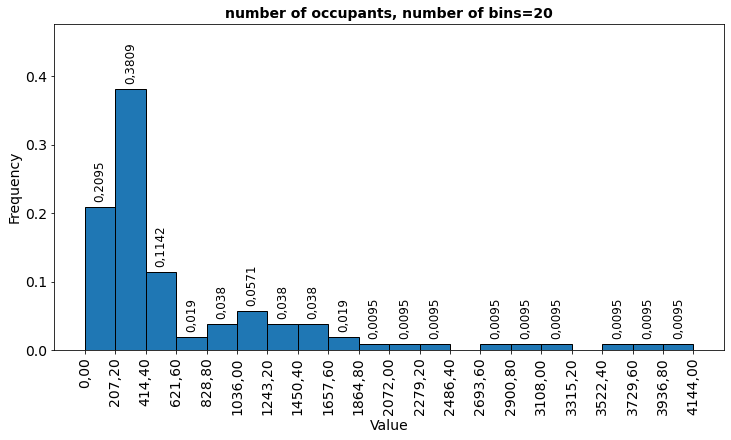

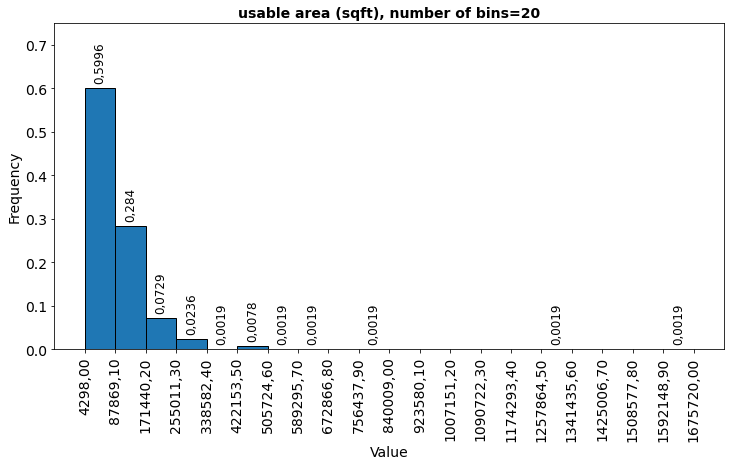

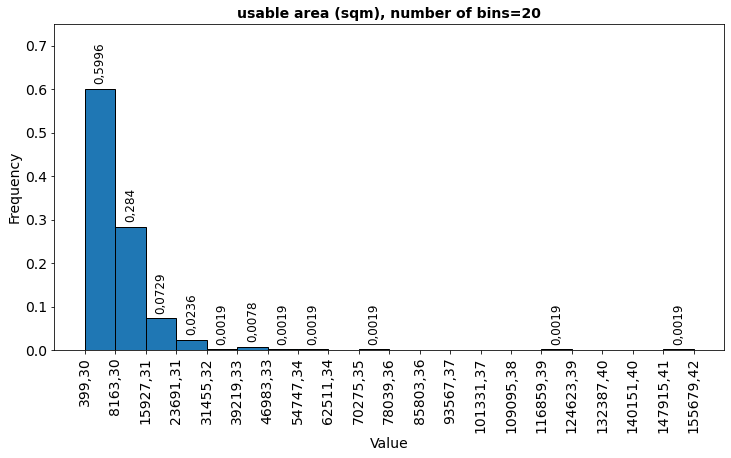

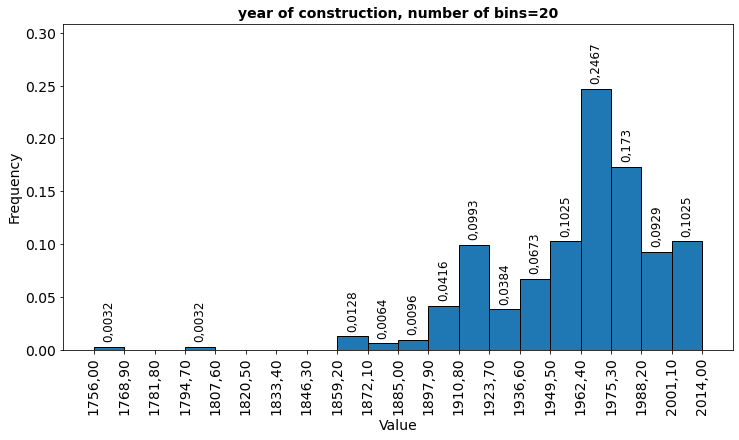

In [129]:
numerical_columns = meta_open_describe.loc[meta_open_describe.type == 'numeric'].index

bins = 20
for index, column in enumerate(numerical_columns):
    values = meta_open[meta_open[column].notna()][column]
    name = meta_open_describe.loc[column, 'name']
    draw_hist(values, bins, name)

In [130]:
def read_consumption_csv(name: str):
    df = pd.read_csv(f'./data/raw/{name}.csv', header=0, names=['timestamp', 'consumption'])
    df['uid'] = name
    return df

time_series_all = read_consumption_csv(meta_open.iloc[0, 0])
for name in meta_open.iloc[1:, 0]:
    time_series_all = pd.concat([time_series_all, read_consumption_csv(name)])

time_series_all

,timestamp,consumption,uid
0,2015-01-01 00:00:00,27.790,Office_Abbey
1,2015-01-01 01:00:00,27.660,Office_Abbey
2,2015-01-01 02:00:00,27.130,Office_Abbey
3,2015-01-01 03:00:00,27.340,Office_Abbey
4,2015-01-01 04:00:00,27.340,Office_Abbey
...,...,...,...
8755,2013-12-31 19:00:00,46.250,UnivLab_Tracy
8756,2013-12-31 20:00:00,46.000,UnivLab_Tracy
8757,2013-12-31 21:00:00,46.500,UnivLab_Tracy
8758,2013-12-31 22:00:00,45.875,UnivLab_Tracy


In [131]:
time_series_all.isna().sum()

timestamp      0
consumption    0
uid            0
dtype: int64

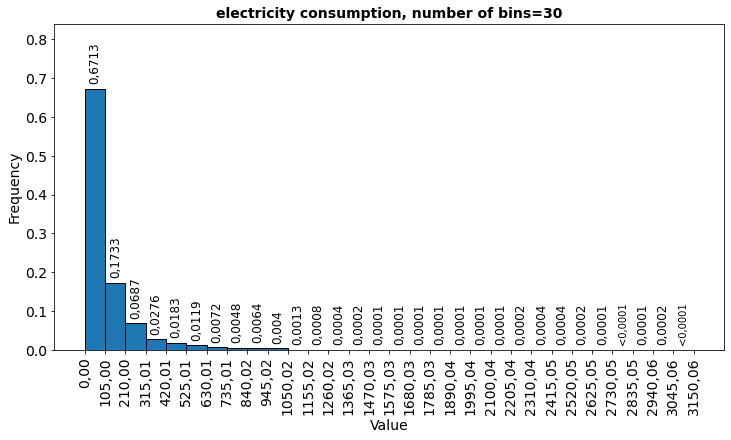

In [132]:
draw_hist(time_series_all['consumption'], 30, 'electricity consumption')

In [133]:
time_series_all_grouped = time_series_all.groupby('uid') \
    .agg(
        mean=('consumption', np.mean), 
        median=('consumption', np.median),
        std=('consumption', np.std),
        min=('consumption', np.min),
        max=('consumption', np.max),
    ).reset_index()
time_series_all_grouped

,uid,mean,median,std,min,max
0,Office_Abbey,51.370397,51.915000,17.019449,17.8600,98.680000
1,Office_Abigail,8.824310,7.180000,4.648389,0.8000,24.077500
2,Office_Al,122.944273,109.205000,44.040443,28.8500,227.220000
3,Office_Alannah,18.139756,15.540000,9.153139,2.9500,46.280000
4,Office_Aliyah,364.245515,356.255000,40.727715,183.2000,472.090000
...,...,...,...,...,...,...
502,UnivLab_Tami,61.487000,60.250000,13.055549,34.5000,100.000000
503,UnivLab_Taylor,64.026822,61.476113,10.772450,41.6750,96.180630
504,UnivLab_Terrie,82.450183,77.616699,12.928921,56.7325,121.259277
505,UnivLab_Tracie,585.586198,547.525275,94.104593,368.9030,851.988965


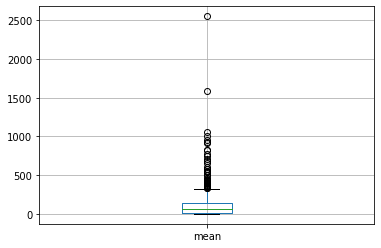

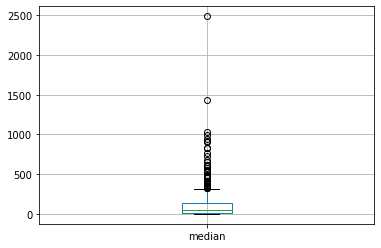

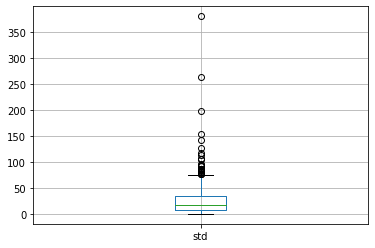

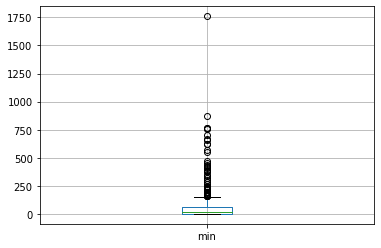

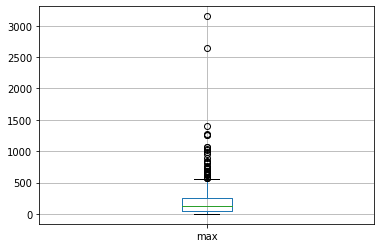

In [134]:
for column in time_series_all_grouped.columns[1:]:
    time_series_all_grouped.boxplot(column)
    plt.show()

In [135]:
time_series_all_grouped_out = time_series_all_grouped.copy()

for column in time_series_all_grouped_out.columns[1:]:
    q1=time_series_all_grouped_out[column].quantile(0.25)
    q3=time_series_all_grouped_out[column].quantile(0.75)
    IQR=q3-q1
    time_series_all_grouped_out[f'{column}_out'] = 0
    time_series_all_grouped_out.loc[((time_series_all_grouped_out[column]<(q1-1.5*IQR)) | (time_series_all_grouped_out[column]>(q3+1.5*IQR))), f'{column}_out'] = 1

time_series_all_grouped_out['out_all'] = time_series_all_grouped_out[['mean_out', 'median_out', 'std_out', 'min_out', 'max_out']].all(axis=1)
time_series_all_grouped_out['out_any'] = time_series_all_grouped_out[['mean_out', 'median_out', 'std_out', 'min_out', 'max_out']].any(axis=1)
time_series_all_grouped_out

,uid,mean,median,std,min,max,mean_out,median_out,std_out,min_out,max_out,out_all,out_any
0,Office_Abbey,51.370397,51.915000,17.019449,17.8600,98.680000,0,0,0,0,0,False,False
1,Office_Abigail,8.824310,7.180000,4.648389,0.8000,24.077500,0,0,0,0,0,False,False
2,Office_Al,122.944273,109.205000,44.040443,28.8500,227.220000,0,0,0,0,0,False,False
3,Office_Alannah,18.139756,15.540000,9.153139,2.9500,46.280000,0,0,0,0,0,False,False
4,Office_Aliyah,364.245515,356.255000,40.727715,183.2000,472.090000,1,1,0,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,UnivLab_Tami,61.487000,60.250000,13.055549,34.5000,100.000000,0,0,0,0,0,False,False
503,UnivLab_Taylor,64.026822,61.476113,10.772450,41.6750,96.180630,0,0,0,0,0,False,False
504,UnivLab_Terrie,82.450183,77.616699,12.928921,56.7325,121.259277,0,0,0,0,0,False,False
505,UnivLab_Tracie,585.586198,547.525275,94.104593,368.9030,851.988965,1,1,1,1,1,True,True


In [136]:
time_series_all_grouped_out[time_series_all_grouped_out['out_all']]

,uid,mean,median,std,min,max,mean_out,median_out,std_out,min_out,max_out,out_all,out_any
61,Office_Gemma,704.824907,609.600000,197.984780,264.300000,1258.800000,1,1,1,1,1,True,True
63,Office_Gisselle,1583.747409,1437.950000,380.680054,620.800000,2649.300000,1,1,1,1,1,True,True
89,Office_Luann,436.469180,412.000000,77.373367,194.746939,682.102500,1,1,1,1,1,True,True
121,Office_Milton,776.033831,763.500000,85.384533,625.500000,1015.000000,1,1,1,1,1,True,True
316,UnivClass_Nash,333.781439,321.000000,76.110295,177.999930,570.667050,1,1,1,1,1,True,True
433,UnivLab_Aoife,2551.206898,2486.785000,263.517629,1760.420000,3150.060000,1,1,1,1,1,True,True
448,UnivLab_Callie,741.815777,723.612518,127.346651,471.375000,1039.724976,1,1,1,1,1,True,True
453,UnivLab_Carlton,1055.556076,1028.812515,116.909007,762.924988,1405.750000,1,1,1,1,1,True,True
454,UnivLab_Carol,392.767282,365.687515,84.135062,156.024994,640.500000,1,1,1,1,1,True,True
471,UnivLab_Dianna,934.222459,914.150000,112.911665,653.920000,1263.475000,1,1,1,1,1,True,True


In [137]:
time_series_all_grouped_out[time_series_all_grouped_out['out_any']]

,uid,mean,median,std,min,max,mean_out,median_out,std_out,min_out,max_out,out_all,out_any
4,Office_Aliyah,364.245515,356.255000,40.727715,183.200000,472.090000,1,1,0,1,0,False,True
27,Office_Bryon,350.084169,352.412500,40.690497,224.075000,475.550000,1,1,0,1,0,False,True
29,Office_Cameron,448.151775,447.837494,47.341222,346.425003,589.774994,1,1,0,1,1,False,True
39,Office_Colby,228.473016,221.274994,29.588922,172.600006,314.149994,0,0,0,1,0,False,True
44,Office_Curt,278.345341,270.075012,45.102959,160.949997,412.175018,0,0,0,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,UnivLab_Patsy,469.461830,466.058333,18.215105,415.666667,523.850000,1,1,0,1,0,False,True
495,UnivLab_Peyton,1006.936469,997.711530,92.655974,752.729172,1278.155565,1,1,1,1,1,True,True
496,UnivLab_Phil,607.189359,601.546526,80.097306,423.552780,822.865276,1,1,1,1,1,True,True
499,UnivLab_Santiago,441.834963,414.000000,74.244104,232.000000,663.000000,1,1,0,1,1,False,True


In [138]:
#time_series_all_grouped_out[time_series_all_grouped_out['out_any']]['uid'].to_csv('./data/buildings_out.csv', index=False)

In [139]:
time_series_all_outliers = time_series_all_grouped_out[time_series_all_grouped_out['out_any']]
time_series_all_outliers

,uid,mean,median,std,min,max,mean_out,median_out,std_out,min_out,max_out,out_all,out_any
4,Office_Aliyah,364.245515,356.255000,40.727715,183.200000,472.090000,1,1,0,1,0,False,True
27,Office_Bryon,350.084169,352.412500,40.690497,224.075000,475.550000,1,1,0,1,0,False,True
29,Office_Cameron,448.151775,447.837494,47.341222,346.425003,589.774994,1,1,0,1,1,False,True
39,Office_Colby,228.473016,221.274994,29.588922,172.600006,314.149994,0,0,0,1,0,False,True
44,Office_Curt,278.345341,270.075012,45.102959,160.949997,412.175018,0,0,0,1,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,UnivLab_Patsy,469.461830,466.058333,18.215105,415.666667,523.850000,1,1,0,1,0,False,True
495,UnivLab_Peyton,1006.936469,997.711530,92.655974,752.729172,1278.155565,1,1,1,1,1,True,True
496,UnivLab_Phil,607.189359,601.546526,80.097306,423.552780,822.865276,1,1,1,1,1,True,True
499,UnivLab_Santiago,441.834963,414.000000,74.244104,232.000000,663.000000,1,1,0,1,1,False,True


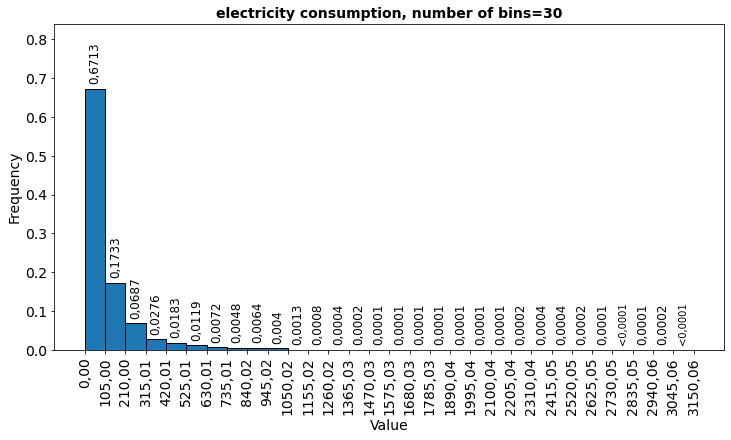

In [140]:
draw_hist(time_series_all['consumption'], 30, 'electricity consumption')

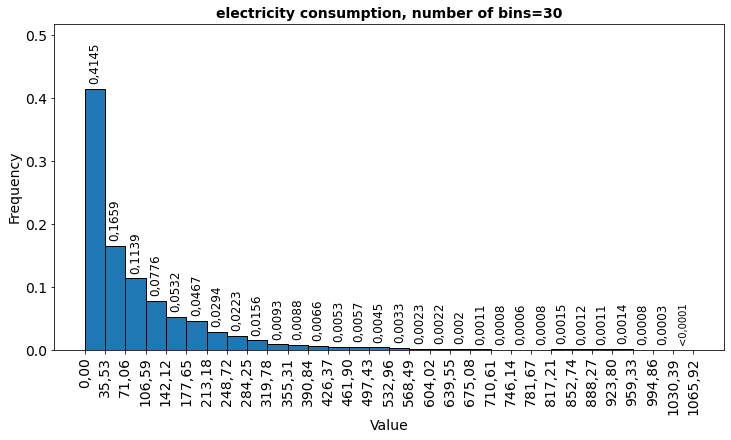

In [141]:
draw_hist(time_series_all[~time_series_all['uid'].isin(time_series_all_grouped_out[time_series_all_grouped_out['out_all']]['uid'])]['consumption'], 30, 'electricity consumption')

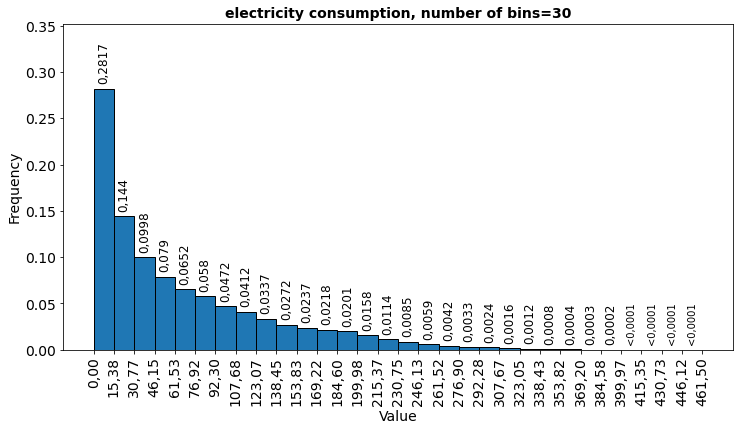

In [142]:
draw_hist(time_series_all[~time_series_all['uid'].isin(time_series_all_outliers['uid'])]['consumption'], 30, 'electricity consumption')

In [143]:
time_series_all = time_series_all[~time_series_all['uid'].isin(time_series_all_outliers['uid'])]
time_series_all

,timestamp,consumption,uid
0,2015-01-01 00:00:00,27.790,Office_Abbey
1,2015-01-01 01:00:00,27.660,Office_Abbey
2,2015-01-01 02:00:00,27.130,Office_Abbey
3,2015-01-01 03:00:00,27.340,Office_Abbey
4,2015-01-01 04:00:00,27.340,Office_Abbey
...,...,...,...
8755,2013-12-31 19:00:00,46.250,UnivLab_Tracy
8756,2013-12-31 20:00:00,46.000,UnivLab_Tracy
8757,2013-12-31 21:00:00,46.500,UnivLab_Tracy
8758,2013-12-31 22:00:00,45.875,UnivLab_Tracy


<Figure size 864x576 with 0 Axes>

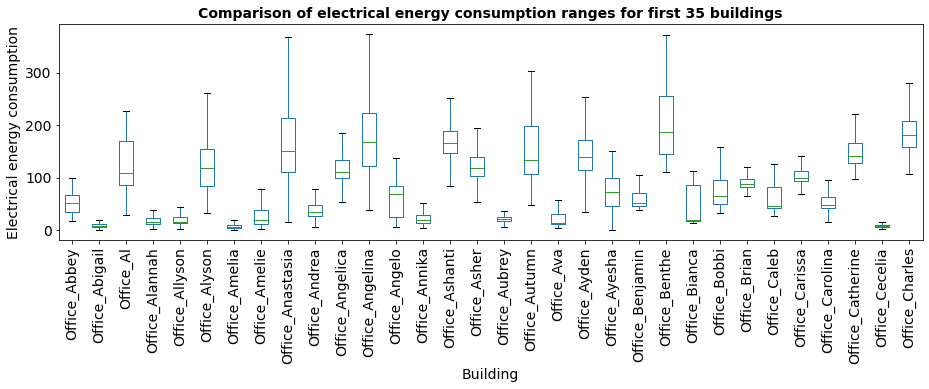

In [144]:
plt.figure(figsize=(12, 8))
time_series_all.loc[time_series_all['uid'].isin(meta_open['uid'][0:35])].boxplot(column='consumption', by='uid', grid=False, figsize=(15,4), fontsize=14, showfliers=False)
plt.title('Comparison of electrical energy consumption ranges for first 35 buildings', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.ylabel('Electrical energy consumption', fontsize=14)
plt.xlabel('Building', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [145]:
Office_Abbey_sample = time_series_all.loc[time_series_all['uid'] == 'Office_Abbey']
Office_Abbey_sample = Office_Abbey_sample.iloc[:313]
Office_Abbey_sample

,timestamp,consumption,uid
0,2015-01-01 00:00:00,27.79,Office_Abbey
1,2015-01-01 01:00:00,27.66,Office_Abbey
2,2015-01-01 02:00:00,27.13,Office_Abbey
3,2015-01-01 03:00:00,27.34,Office_Abbey
4,2015-01-01 04:00:00,27.34,Office_Abbey
...,...,...,...
308,2015-01-13 20:00:00,69.39,Office_Abbey
309,2015-01-13 21:00:00,68.74,Office_Abbey
310,2015-01-13 22:00:00,41.81,Office_Abbey
311,2015-01-13 23:00:00,32.09,Office_Abbey


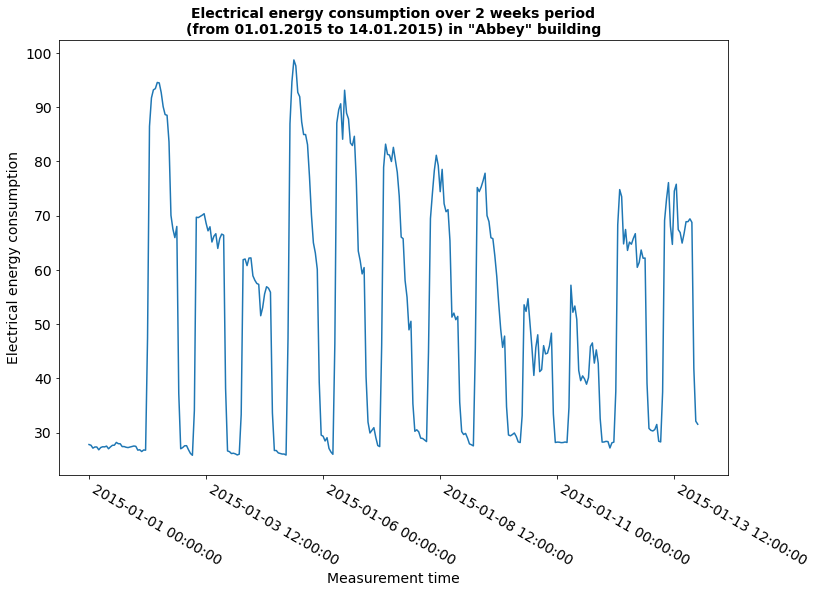

In [146]:
plt.figure(figsize=(12, 8))
plt.plot(Office_Abbey_sample.consumption)
plt.title('Electrical energy consumption over 2 weeks period\n(from 01.01.2015 to 14.01.2015) in "Abbey" building', fontsize=14, fontweight='bold')
ticks = [0, 60, 120, 180, 240, 300]
plt.xticks(ticks, [Office_Abbey_sample.timestamp[i] for i in ticks], rotation=-30, horizontalalignment='left', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Electrical energy consumption', fontsize=14)
plt.xlabel('Measurement time', fontsize=14)
plt.show()

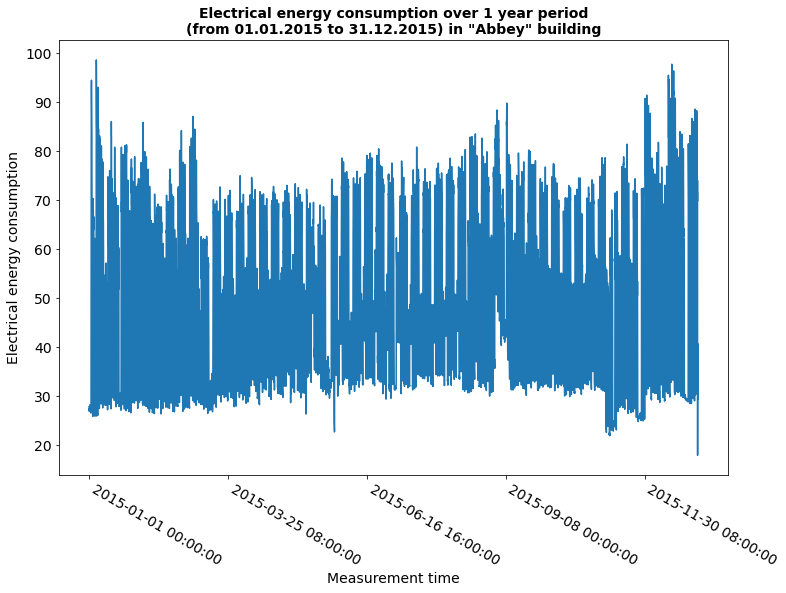

In [147]:
plt.figure(figsize=(12, 8))
plt.plot(time_series_all.loc[time_series_all['uid'] == 'Office_Abbey'].consumption)
plt.title('Electrical energy consumption over 1 year period\n(from 01.01.2015 to 31.12.2015) in "Abbey" building', fontsize=14, fontweight='bold')
ticks = [0, 2000, 4000, 6000, 8000]
plt.xticks(ticks, [time_series_all.loc[time_series_all['uid'] == 'Office_Abbey'].timestamp[i] for i in ticks], rotation=-30, horizontalalignment='left', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Electrical energy consumption', fontsize=14)
plt.xlabel('Measurement time', fontsize=14)
plt.show()

In [148]:
def read_weather_csv(name: str, weather_csv: str):
    df = pd.read_csv(f'./data/raw/{weather_csv}')
    df['uid'] = name
    return df

weather_all = read_weather_csv(meta_open['uid'][0], meta_open['newweatherfilename'][0])
for index in meta_open.index[1:]:
    uid = meta_open['uid'][index]
    newweatherfilename = meta_open['newweatherfilename'][index]
    weather_all = pd.concat([weather_all, read_weather_csv(uid, newweatherfilename)])

weather_all

,timestamp,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,...,Conditions<br />,Time,TimePDT,TimePST,TimeBST,TimeGMT,TimeCEST,TimeCET,TimeMDT,TimeSGT
0,2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2013-12-31 22:20:00,NaN,-3.0,-3.0,100.0,1016.0,0.3,Variable,1.9,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:20 PM,NaN,NaN
24317,2013-12-31 22:50:00,NaN,-3.0,-3.0,100.0,1016.0,0.3,Variable,3.7,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:50 PM,NaN,NaN
24318,2013-12-31 23:00:00,NaN,-3.0,-3.0,100.0,1019.0,NaN,North,1.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:00 PM,NaN,NaN
24319,2013-12-31 23:20:00,NaN,-3.0,-3.0,100.0,1016.0,0.3,Variable,1.9,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:20 PM,NaN,NaN


In [149]:
weather_all.columns

Index(['timestamp', 'TimeMST', 'TemperatureC', 'Dew PointC', 'Humidity',
       'Sea Level PressurehPa', 'VisibilityKm', 'Wind Direction',
       'Wind SpeedKm/h', 'Gust SpeedKm/h', 'Precipitationmm', 'Events',
       'Conditions', 'WindDirDegrees', 'DateUTC<br />', 'timestamp.1', 'uid',
       'TimeCDT', 'TimeCST', 'TimeEDT', 'TimeEST', 'Conditions<br />', 'Time',
       'TimePDT', 'TimePST', 'TimeBST', 'TimeGMT', 'TimeCEST', 'TimeCET',
       'TimeMDT', 'TimeSGT'],
      dtype='object')

In [150]:
weather_all = weather_all.drop(columns=['TimeCDT', 'TimeCST', 'TimeEDT', 'TimeEST', 'Time', 
    'TimePDT', 'TimePST', 'TimeBST', 'TimeGMT', 'TimeCEST', 'TimeCET',
    'TimeMDT', 'TimeSGT', 'TimeMST', 'timestamp.1', 'DateUTC<br />', 'Conditions<br />'])

In [151]:
weather_all

,timestamp,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,uid
0,2015-01-01 00:51:00,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300.0,Office_Abbey
1,2015-01-01 01:47:00,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,-,NaN,NaN,Mostly Cloudy,300.0,Office_Abbey
2,2015-01-01 01:51:00,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300.0,Office_Abbey
3,2015-01-01 02:51:00,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320.0,Office_Abbey
4,2015-01-01 03:51:00,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60.0,Office_Abbey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2013-12-31 22:20:00,-3.0,-3.0,100.0,1016.0,0.3,Variable,1.9,-,NaN,Fog,Light Freezing Fog,0.0,UnivLab_Tracy
24317,2013-12-31 22:50:00,-3.0,-3.0,100.0,1016.0,0.3,Variable,3.7,-,NaN,Fog,Light Freezing Fog,0.0,UnivLab_Tracy
24318,2013-12-31 23:00:00,-3.0,-3.0,100.0,1019.0,NaN,North,1.9,NaN,NaN,NaN,NaN,0.0,UnivLab_Tracy
24319,2013-12-31 23:20:00,-3.0,-3.0,100.0,1016.0,0.3,Variable,1.9,-,NaN,Fog,Light Freezing Fog,0.0,UnivLab_Tracy


In [152]:
weather_all.isna().sum()

timestamp                      0
TemperatureC                 144
Dew PointC                   144
Humidity                   15344
Sea Level PressurehPa        288
VisibilityKm               67620
Wind Direction                 1
Wind SpeedKm/h                 1
Gust SpeedKm/h             85548
Precipitationmm          6151797
Events                   5919470
Conditions                 68352
WindDirDegrees               540
uid                            0
dtype: int64

In [153]:
time_series_all['timestamp'] = pd.to_datetime(time_series_all['timestamp'])
weather_all['timestamp'] = pd.to_datetime(weather_all['timestamp'])

C:\Users\pdude\AppData\Local\Temp\ipykernel_57836\378767473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_all['timestamp'] = pd.to_datetime(time_series_all['timestamp'])


In [154]:
time_series_all_for_merge = time_series_all.sort_values('timestamp')
weather_all_for_merge = weather_all.sort_values('timestamp')

In [155]:
consumption_and_wather_all = pd.merge_asof(time_series_all_for_merge, weather_all_for_merge, by='uid', on='timestamp', direction='nearest')
consumption_and_wather_all

,timestamp,consumption,uid,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees
0,2012-01-01 00:00:00,8.870233,PrimClass_Evie,12.2,1.7,49.0,1014.4,16.1,South,18.5,-,NaN,NaN,Scattered Clouds,180.0
1,2012-01-01 00:00:00,54.600075,Office_Ellis,5.0,1.7,79.0,1019.6,16.1,West,11.1,-,NaN,NaN,Partly Cloudy,260.0
2,2012-01-01 00:00:00,6.060267,PrimClass_Ervin,3.0,1.0,87.0,1020.5,16.1,Calm,Calm,-,NaN,NaN,Overcast,0.0
3,2012-01-01 00:00:00,226.700000,UnivClass_Bob,3.0,-2.0,70.0,1019.9,16.1,NW,14.8,25.9,NaN,NaN,Clear,320.0
4,2012-01-01 00:00:00,23.975000,UnivClass_Beatrice,3.0,-2.0,70.0,1019.9,16.1,NW,14.8,25.9,NaN,NaN,Clear,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881827,2015-12-31 23:00:00,131.290000,Office_Ashanti,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0.0
3881828,2015-12-31 23:00:00,8.050000,Office_Clarissa,-1.0,-2.0,93.0,1018.8,6.4,NNW,7.4,-,NaN,Snow,Light Snow,340.0
3881829,2015-12-31 23:00:00,233.200000,Office_Alyson,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0.0
3881830,2015-12-31 23:00:00,24.770000,Office_Andrea,9.4,-6.1,33.0,1017.4,16.1,Calm,Calm,-,NaN,NaN,Clear,0.0


In [156]:
consumption_and_wather_all = consumption_and_wather_all.sort_values(['uid', 'timestamp'])
consumption_and_wather_all

,timestamp,consumption,uid,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees
980744,2015-01-01 00:00:00,27.790,Office_Abbey,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300.0
981090,2015-01-01 01:00:00,27.660,Office_Abbey,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300.0
981446,2015-01-01 02:00:00,27.130,Office_Abbey,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300.0
981743,2015-01-01 03:00:00,27.340,Office_Abbey,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320.0
982320,2015-01-01 04:00:00,27.340,Office_Abbey,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561743,2013-12-31 19:00:00,46.250,UnivLab_Tracy,-2.0,-2.0,99.0,1019.0,0.3,NNW,3.7,NaN,NaN,Fog,Heavy Fog,330.0
561755,2013-12-31 20:00:00,46.000,UnivLab_Tracy,-2.0,-2.0,98.0,1019.0,NaN,North,5.6,NaN,NaN,NaN,NaN,0.0
561761,2013-12-31 21:00:00,46.500,UnivLab_Tracy,-3.0,-3.0,100.0,1019.0,NaN,NW,3.7,NaN,NaN,NaN,NaN,320.0
561779,2013-12-31 22:00:00,45.875,UnivLab_Tracy,-3.0,-3.0,100.0,1019.0,0.5,NNE,5.6,NaN,NaN,Fog,Heavy Fog,20.0


In [157]:
columns_mapper = {
    "TemperatureC": "temperature",
    "Dew PointC": "dew_point",
    "Humidity": "humidity",
    "Sea Level PressurehPa": "sea_level_pressure",
    "VisibilityKm": "visibility",
    "Wind Direction": "wind_direction",
    "Wind SpeedKm/h": "wind_speed",
    "Gust SpeedKm/h": "gust_speed",
    "Precipitationmm": "precipitation",
    "Events": "events",
    "Conditions": "conditions",
    "WindDirDegrees": "wind_direction_degrees",
}
consumption_and_wather_all = consumption_and_wather_all.rename(columns=columns_mapper)
consumption_and_wather_all

,timestamp,consumption,uid,temperature,dew_point,humidity,sea_level_pressure,visibility,wind_direction,wind_speed,gust_speed,precipitation,events,conditions,wind_direction_degrees
980744,2015-01-01 00:00:00,27.790,Office_Abbey,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300.0
981090,2015-01-01 01:00:00,27.660,Office_Abbey,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,-,NaN,NaN,Mostly Cloudy,300.0
981446,2015-01-01 02:00:00,27.130,Office_Abbey,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,-,NaN,NaN,Mostly Cloudy,300.0
981743,2015-01-01 03:00:00,27.340,Office_Abbey,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,-,NaN,NaN,Scattered Clouds,320.0
982320,2015-01-01 04:00:00,27.340,Office_Abbey,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,-,NaN,NaN,Partly Cloudy,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561743,2013-12-31 19:00:00,46.250,UnivLab_Tracy,-2.0,-2.0,99.0,1019.0,0.3,NNW,3.7,NaN,NaN,Fog,Heavy Fog,330.0
561755,2013-12-31 20:00:00,46.000,UnivLab_Tracy,-2.0,-2.0,98.0,1019.0,NaN,North,5.6,NaN,NaN,NaN,NaN,0.0
561761,2013-12-31 21:00:00,46.500,UnivLab_Tracy,-3.0,-3.0,100.0,1019.0,NaN,NW,3.7,NaN,NaN,NaN,NaN,320.0
561779,2013-12-31 22:00:00,45.875,UnivLab_Tracy,-3.0,-3.0,100.0,1019.0,0.5,NNE,5.6,NaN,NaN,Fog,Heavy Fog,20.0


In [158]:
consumption_and_wather_all['gust_speed'] = consumption_and_wather_all['gust_speed'] \
    .replace('-', 'nan') \
    .astype('float')

In [159]:
consumption_and_wather_all['wind_speed'] = consumption_and_wather_all['wind_speed'] \
    .replace('Calm', '0') \
    .replace('-9999.0', '0') \
    .astype('float')

In [160]:
for column in ['temperature','dew_point','humidity','sea_level_pressure', 'visibility']:
    consumption_and_wather_all[column] = consumption_and_wather_all[column].replace(-9999, np.nan)

In [161]:
consumption_and_wather_all['sea_level_pressure'] = consumption_and_wather_all['sea_level_pressure'].replace(0, np.nan)

In [162]:
consumption_and_wather_all['events'] = consumption_and_wather_all['events'].fillna('Calm')

In [163]:
consumption_and_wather_all_describe = pd.DataFrame(consumption_and_wather_all.isna().sum(), columns=['na_sum'])

consumption_and_wather_all_describe['na_pct'] = consumption_and_wather_all_describe['na_sum'] / consumption_and_wather_all.shape[0]
consumption_and_wather_all_describe['na_pct'] = consumption_and_wather_all_describe['na_pct'].round(4)
consumption_and_wather_all_describe['name'] = ['time', 'electrical energy consumption', 'building', 'temperature', 'dew point', 'humidity', 'atmospheric pressure', 'visibility', 'wind direction', 'wind speed', 'gust speed', 'precipitation', 'weather events', 'weather conditions', 'wind direction (degrees)']

consumption_and_wather_all_describe.loc[consumption_and_wather_all.dtypes == 'datetime64[ns]', 'type'] = 'time'
consumption_and_wather_all_describe.loc[consumption_and_wather_all.dtypes == 'object', 'type'] = 'categorical'
consumption_and_wather_all_describe.loc[consumption_and_wather_all.dtypes == 'float64', 'type'] = 'numeric'
consumption_and_wather_all_describe.loc[['uid'], 'type'] = 'identifier'

consumption_and_wather_all_describe.loc[consumption_and_wather_all_describe.type == 'categorical', 'values'] = ''

for index, row in consumption_and_wather_all_describe.iterrows():
    if row['type'] == 'categorical':
        values = consumption_and_wather_all[index].unique().astype(str)
        consumption_and_wather_all_describe.loc[index, 'values'] = ', '.join(values)
        consumption_and_wather_all_describe.loc[index, 'values_num'] = len(values)

consumption_and_wather_all_describe

,na_sum,na_pct,name,type,values,values_num
timestamp,0,0.0000,time,time,NaN,NaN
consumption,0,0.0000,electrical energy consumption,numeric,NaN,NaN
uid,0,0.0000,building,identifier,NaN,NaN
temperature,4921,0.0013,temperature,numeric,NaN,NaN
dew_point,5216,0.0013,dew point,numeric,NaN,NaN
humidity,5368,0.0014,humidity,numeric,NaN,NaN
sea_level_pressure,2442,0.0006,atmospheric pressure,numeric,NaN,NaN
visibility,279611,0.0720,visibility,numeric,NaN,NaN
wind_direction,1,0.0000,wind direction,categorical,"WNW, NW, ENE, East, Calm, North, NNW, WSW, Var...",19.0
wind_speed,1,0.0000,wind speed,numeric,NaN,NaN


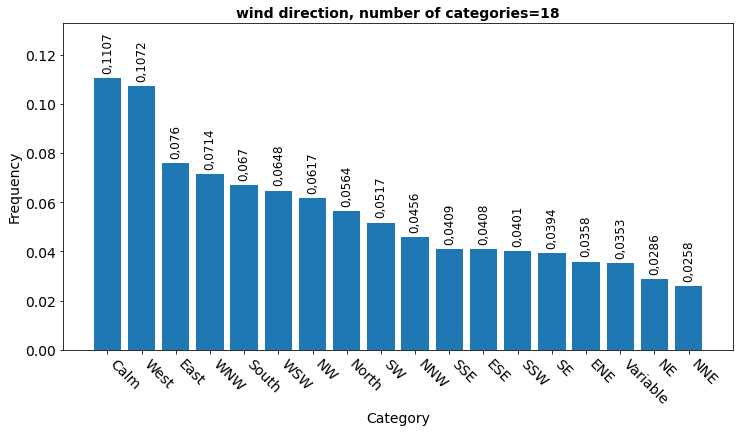

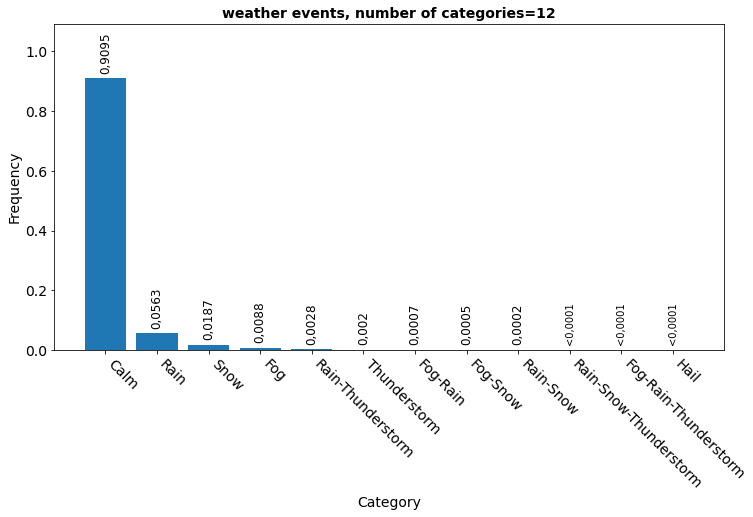

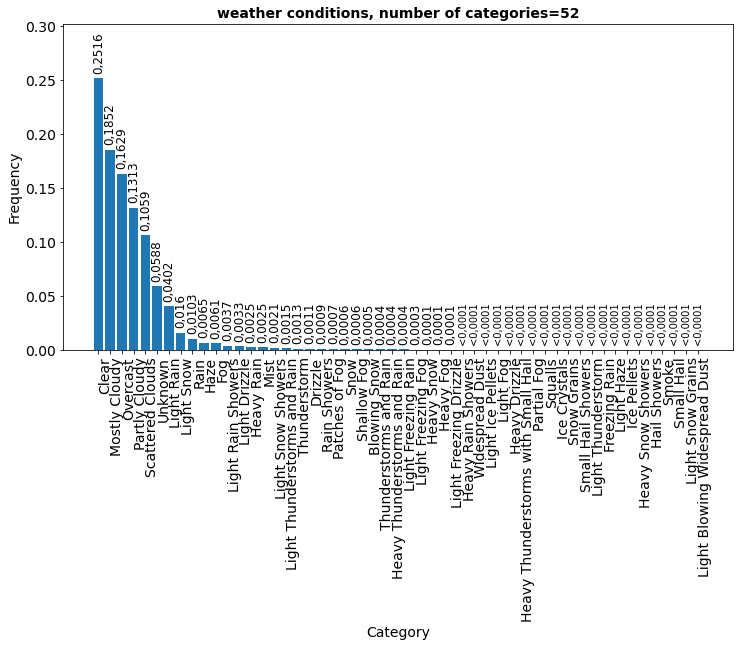

In [164]:
categorical_columns = consumption_and_wather_all_describe.loc[consumption_and_wather_all_describe.type == 'categorical'].index

for index, column in enumerate(categorical_columns):
    draw_categorical_hist(consumption_and_wather_all[column], consumption_and_wather_all_describe.loc[column, 'name'])

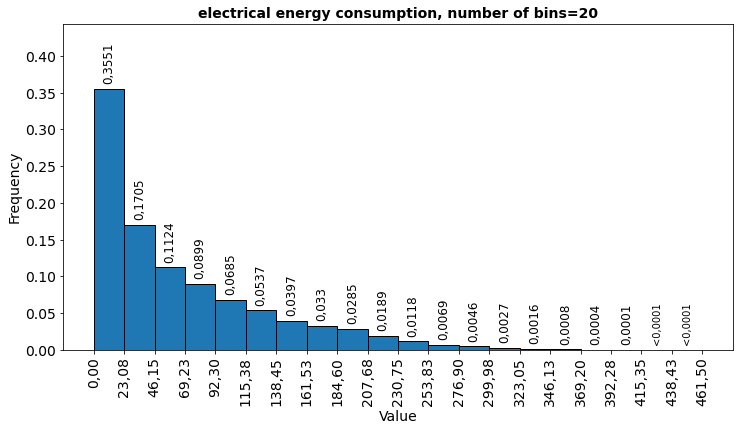

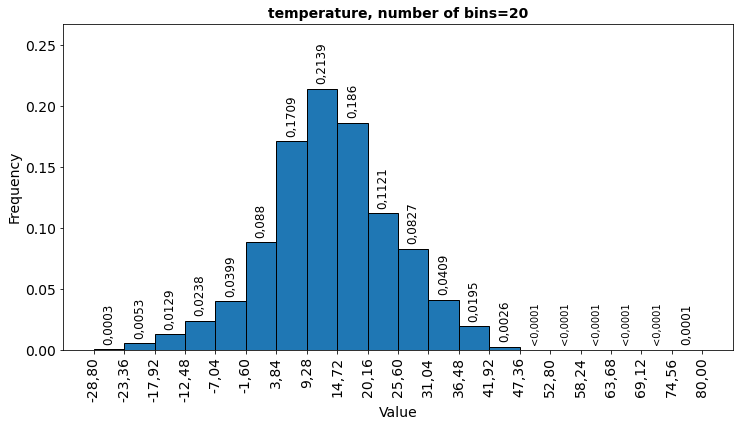

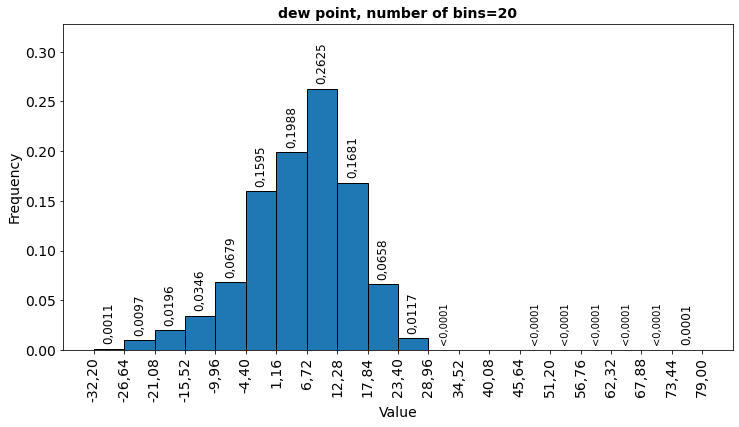

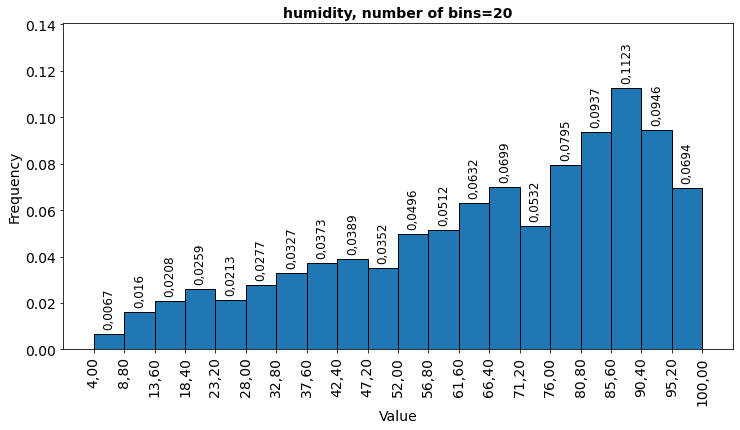

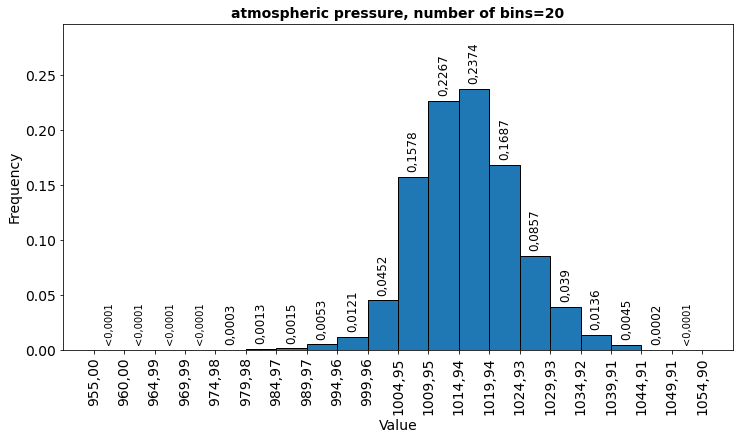

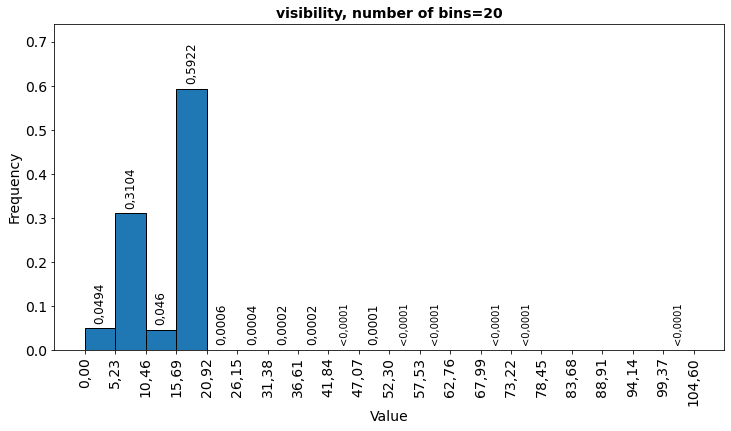

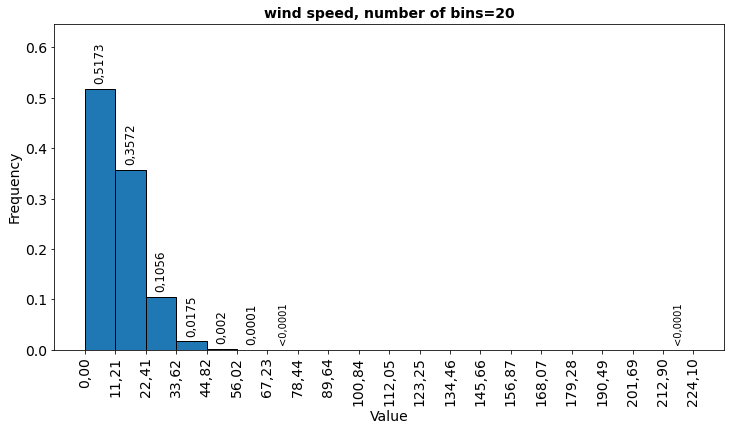

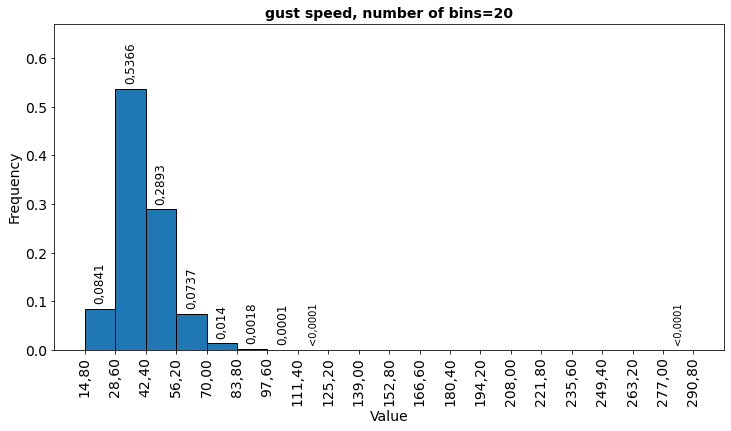

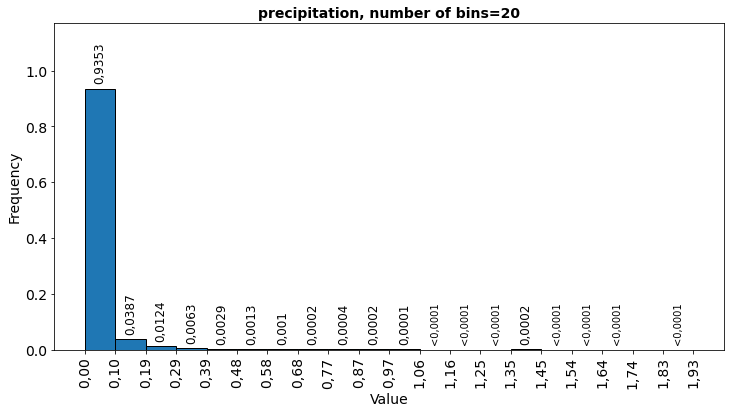

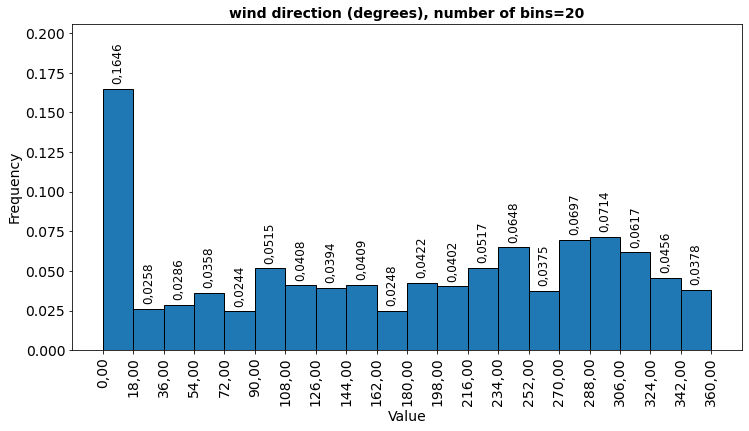

In [165]:
numerical_columns = consumption_and_wather_all_describe.loc[consumption_and_wather_all_describe.type == 'numeric'].index

bins = 20
for index, column in enumerate(numerical_columns):
    values = consumption_and_wather_all[column]
    name = consumption_and_wather_all_describe.loc[column, 'name']
    draw_hist(values, bins, name)

In [166]:
meta_numerical_columns = meta_open_describe.loc[meta_open_describe.type == 'numeric'].index

In [167]:
all_data = consumption_and_wather_all.merge(meta_open[['uid','sqm']], on='uid', how='inner')

In [168]:
columns = all_data.dtypes[all_data.dtypes == 'float64'].index

In [169]:
data = all_data[columns].dropna()

In [170]:
data['consumption'] = data['consumption'] / data['sqm']

In [171]:
data = data.values

In [172]:
consumption = data[:,0]
params = data[:,1:]

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(params)

# PCA
pca = PCA(n_components=3)  # Wybierz liczbę komponentów głównych, które chcesz uzyskać
X_pca = pca.fit_transform(X_scaled)

In [175]:
#shift dataset 
consumption_t1 = consumption[5:]

In [176]:
consumption_t1.shape

(52062,)

In [177]:
consumption[:-1].shape

(52066,)

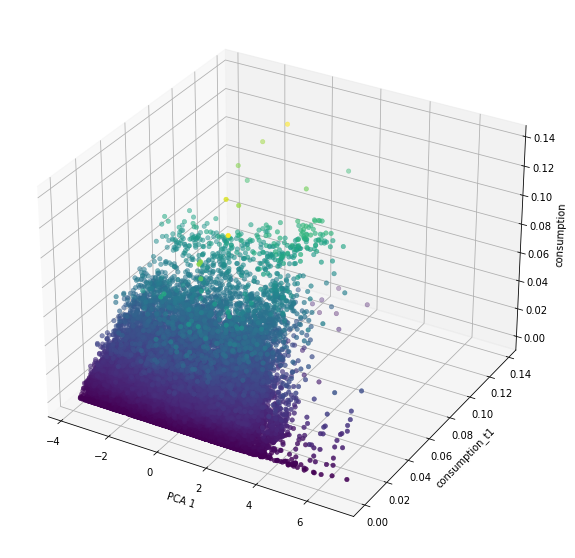

In [178]:
#plot 3d
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0][:-5], consumption_t1, consumption[:-5], c=consumption[:-5], cmap='viridis', linewidth=0.5)
ax.set_xlabel('PCA 1')
ax.set_ylabel('consumption_t1')
ax.set_zlabel('consumption')
plt.show()

In [179]:
X = np.concatenate([X_pca[:-5], consumption_t1.reshape(-1,1)], axis=1)

In [180]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1", input_shape=(X.shape[1],)),
        # layers.Dense(32, activation="relu", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])



Model: "sequential_1"
_________________________________________________________________
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                160       
                                                                 
 layer3 (Dense)              (None, 1)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
 layer1 (Dense)              (None, 32)                160       
                                                                 
 layer3 (Dense)              (None, 1)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
y = consumption[:-5] * 1000

In [182]:
history = model.fit(X[:-1000], y[:-1000], epochs=100, batch_size=32, validation_data=(X[-1000:], y[-1000:]))

Epoch 1/100
1596/1596 [==============================] - 3s 2ms/step - loss: 161.7267 - mae: 8.6179 - mape: 292.8821 - val_loss: 635.4594 - val_mae: 18.6852 - val_mape: 126.8331
Epoch 2/100
1596/1596 [==============================] - 3s 2ms/step - loss: 161.7267 - mae: 8.6179 - mape: 292.8821 - val_loss: 635.4594 - val_mae: 18.6852 - val_mape: 126.8331
Epoch 2/100
1596/1596 [==============================] - 2s 1ms/step - loss: 129.3436 - mae: 7.8923 - mape: 337.2336 - val_loss: 583.0991 - val_mae: 18.0004 - val_mape: 126.4865
Epoch 3/100
1596/1596 [==============================] - 2s 1ms/step - loss: 129.3436 - mae: 7.8923 - mape: 337.2336 - val_loss: 583.0991 - val_mae: 18.0004 - val_mape: 126.4865
Epoch 3/100
1596/1596 [==============================] - 2s 1ms/step - loss: 120.0249 - mae: 7.6134 - mape: 320.8231 - val_loss: 521.5108 - val_mae: 17.0770 - val_mape: 121.0520
Epoch 4/100
1596/1596 [==============================] - 2s 1ms/step - loss: 120.0249 - mae: 7.6134 - mape: 32

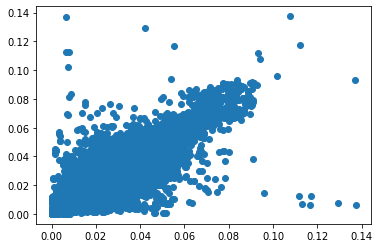

In [183]:
plt.plot(consumption_t1, consumption[:-5], 'o')

In [184]:
id = 1
meta_open.to_csv(f'./data/buildings_{id}.csv', index=False)
consumption_and_wather_all.to_csv(f'./data/time_series_{id}.csv', index=False)